<a href="https://colab.research.google.com/github/MathiasSchindlerCPH/BSE-T2-ML-and-Causal-Inf-repo/blob/main/PSET1_CI_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning and Causal Inference – Problem Set 1**

Submission Date: Feb 1, 2022 <br>
Author: Mathias Schindler <br>
Institution: Barcelona School of Economics, Data Science for Decision Making Program, Class of '22


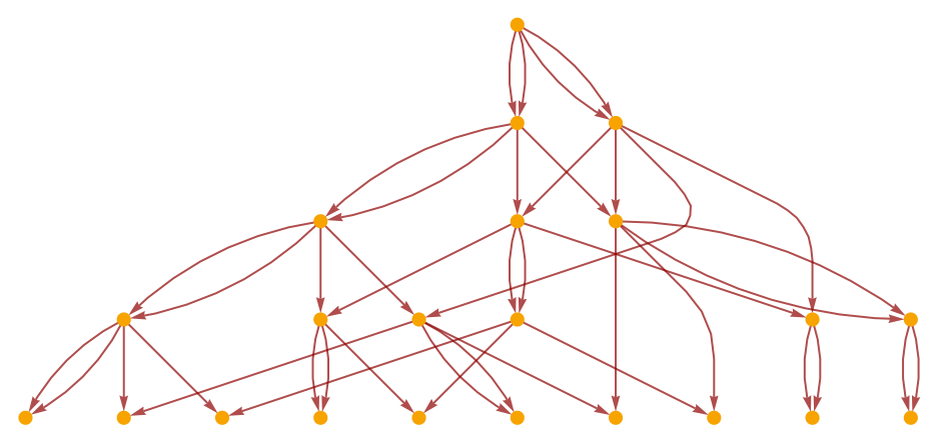

# Preamble

In [45]:
import numpy as np
import pandas as pd

# Create aliases for random generators, better readibility of code
from numpy.random import binomial as bern
from numpy.random import normal as nrm

# Set random seed for reproducibility 
np.random.seed(3123) 

# Reproduction of Exc 1.A using Python

Simulate with $n=10,000$ draws and variables `T` (treatment) and `O` (outcome).

In [53]:
n = 10000
T = bern(n = 1, p = 0.5, size = n)
O = bern(n = 1, p = 0.3, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T)

In [54]:
# Put into dataframe to ease slicing/conditioning
df1 = pd.DataFrame({'T': T, 'O': O})
df1.head()

,T,O
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


1) $O\vert T = 1$ is the filtered dataframe where `T == 1`.

In [55]:
print(df1[df1['T'] == 1].head() )

    T  O
0   1  0
1   1  0
5   1  0
7   1  1
10  1  0


2) Now consider only the column `O` as illustrated below

In [56]:
print(df1[df1['T'] == 1]['O'].head() )

0     0
1     0
5     0
7     1
10    0
Name: O, dtype: int64


3) As only 1s and 0s, take `.mean()` of dataframe above to obtain $\Pr(O=1\vert T = 1) = \mathbb{E}(O=1\vert T = 1)$

In [57]:
print(df1[df1['T'] == 1]['O'].mean())

0.3003138485680659


4) Same analogy to find $ATE = \Pr(O=1\vert T = 1) - \Pr(O=1\vert T = 0) = \mathbb{E}(O=1\vert T = 1) - \mathbb{E}(O=0\vert T = 1)$

In [58]:
print(df1[df1['T'] == 1]['O'].mean() - df1[df1['T'] == 0]['O'].mean())

-0.19438219386359462


# 1. Simulation Exercises

## 1.1 Confounder

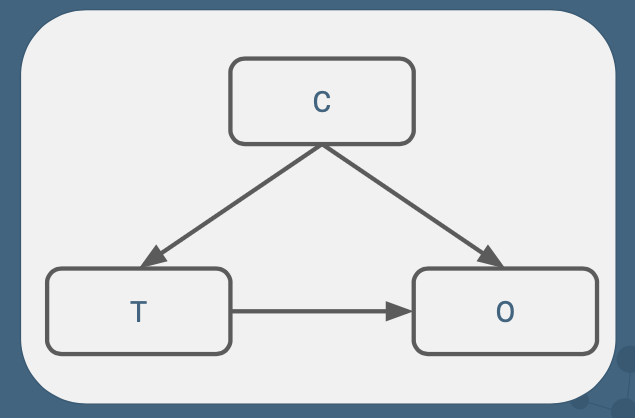

In [68]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

C = bern(n = 1, p = 0.8, size = n)
T = bern(n = 1, p = 0.6, size = n)*C + bern(n = 1, p = 0.2, size = n)*(1-C)
O = bern(n = 1, p = 0.3, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + C + e

In [69]:
# Create dataframe to ease slicing/conditioning
df1 = pd.DataFrame({'C': C, 'T': T, 'O': O})
df1.head(10)

,C,T,O
0,1,1,3.445826
1,1,1,1.411862
2,1,1,1.031595
3,0,1,0.460331
4,1,1,3.051280
5,1,1,1.544539
6,1,1,1.330336
7,1,0,1.011204
8,1,0,2.167707
9,1,0,2.806608


## 1.2 Mediator

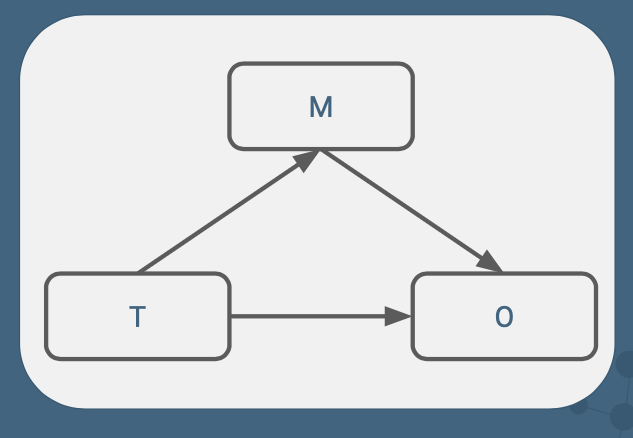

In [65]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

T = bern(n = 1, p = 0.4, size = n)
M = bern(n = 1, p = 0.6, size = n)*T + bern(n = 1, p = 0.2, size = n)*(1-T)
O = bern(n = 1, p = 0.4, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + M + e

In [67]:
# Create dataframe to ease slicing/conditioning
df2 = pd.DataFrame({'T': T, 'M': M, 'O': O})
df2.head(10)

,T,M,O
0,1,1,0.685337
1,0,0,0.996089
2,1,0,0.286438
3,0,0,0.475251
4,0,0,0.313034
5,0,0,0.301694
6,1,1,0.927800
7,0,0,1.786408
8,0,0,1.633686
9,1,0,0.939157


## 1.3 Predictor

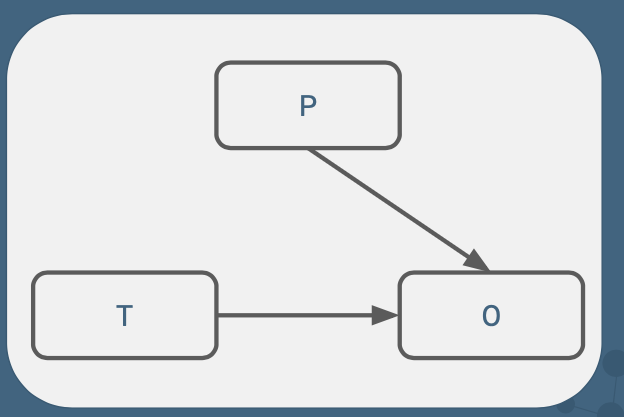

In [72]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

T = bern(n = 1, p = 0.4, size = n)
P = bern(n = 1, p = 0.4, size = n)
O = bern(n = 1, p = 0.4, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + P + e

In [74]:
# Create dataframe to ease slicing/conditioning
df3 = pd.DataFrame({'T': T, 'P': P, 'O': O})
df3.head(10)

,T,P,O
0,0,0,0.866391
1,0,1,1.111330
2,0,1,2.636060
3,0,1,2.902427
4,0,1,2.482742
5,1,0,0.812731
6,1,0,0.406690
7,1,1,0.704962
8,0,1,1.659560
9,1,1,1.983475


## 1.4 Unobserved Confounder


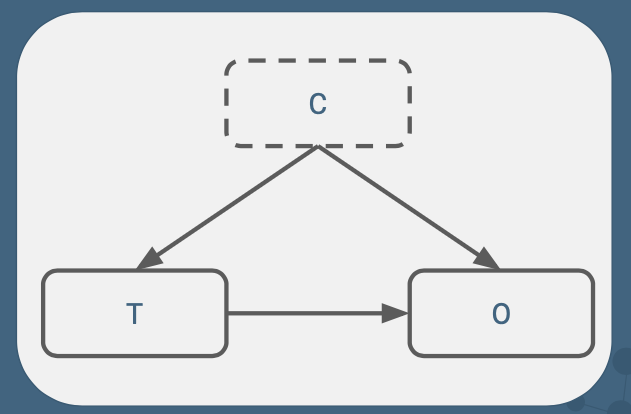

In [75]:
# Create DGP
n = 10000
e = nrm(loc=0.0, scale=1.0, size= n)

C = bern(n = 1, p = 0.8, size = n)
T = bern(n = 1, p = 0.6, size = n)*C+bern(n = 1, p = 0.2, size = n)*(1-C)
O = bern(n = 1, p = 0.3, size = n)*T + bern(n = 1, p = 0.5, size = n)*(1-T) + C + e

In [77]:
# Create dataframe to ease slicing/conditioning
df4 = pd.DataFrame({'C':C, 'T': T, 'O': O})
df4.head(10)

,C,T,O
0,1,0,1.311346
1,1,0,3.337972
2,1,1,1.244293
3,1,1,0.123819
4,1,0,0.732326
5,0,0,-1.139432
6,1,1,3.053093
7,1,0,1.647659
8,1,0,1.509393
9,1,1,2.126631


# 2. Theoretical Exercise